In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


upload the dataset

load the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Bank Customer Churn Prediction.csv',sep=';')

data exploration

In [ ]:
df.head()
print("Shape:",df.shape)
#column names
print("columns:",df.columns)
#Data types and non-null values
df.info()
df.describe()

Shape: (10000, 1)
columns: Index(['customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                       --------------  ----- 
 0   customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


,"customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn"
count,10000
unique,10000
top,"15656710,613,France,Male,40,4,0,1,0,0,151325.24,0"
freq,1


check for missing values and Duplicates


In [ ]:
print(df.isnull().sum()) # Correct the method name to isnull()
print("Duplicate rows:",df.duplicated().sum())

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn    0
dtype: int64
Duplicate rows: 0


visualize a Few Features

Columns in dataset: Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


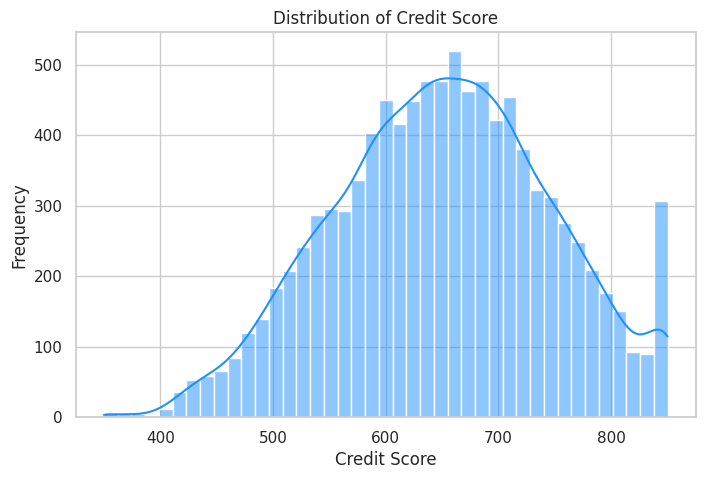

<ipython-input-5-2918bda78e5b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='credit_score', data=df, palette='Set2')


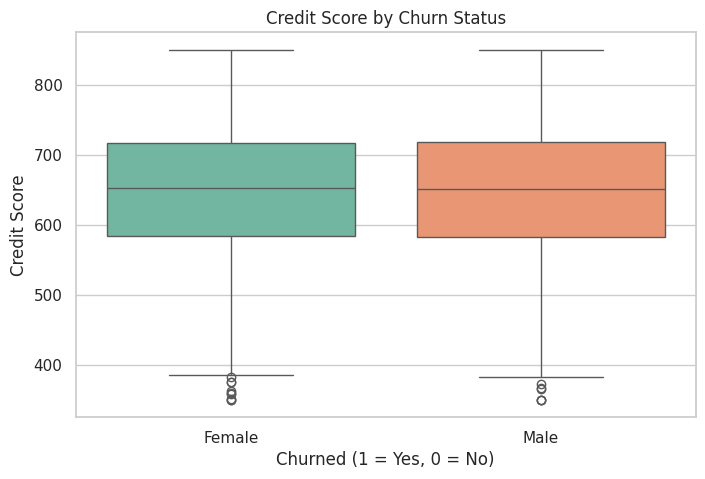

<ipython-input-5-2918bda78e5b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


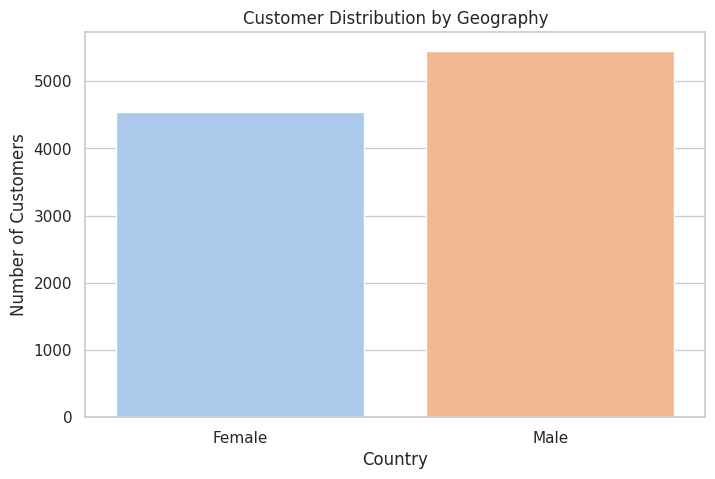

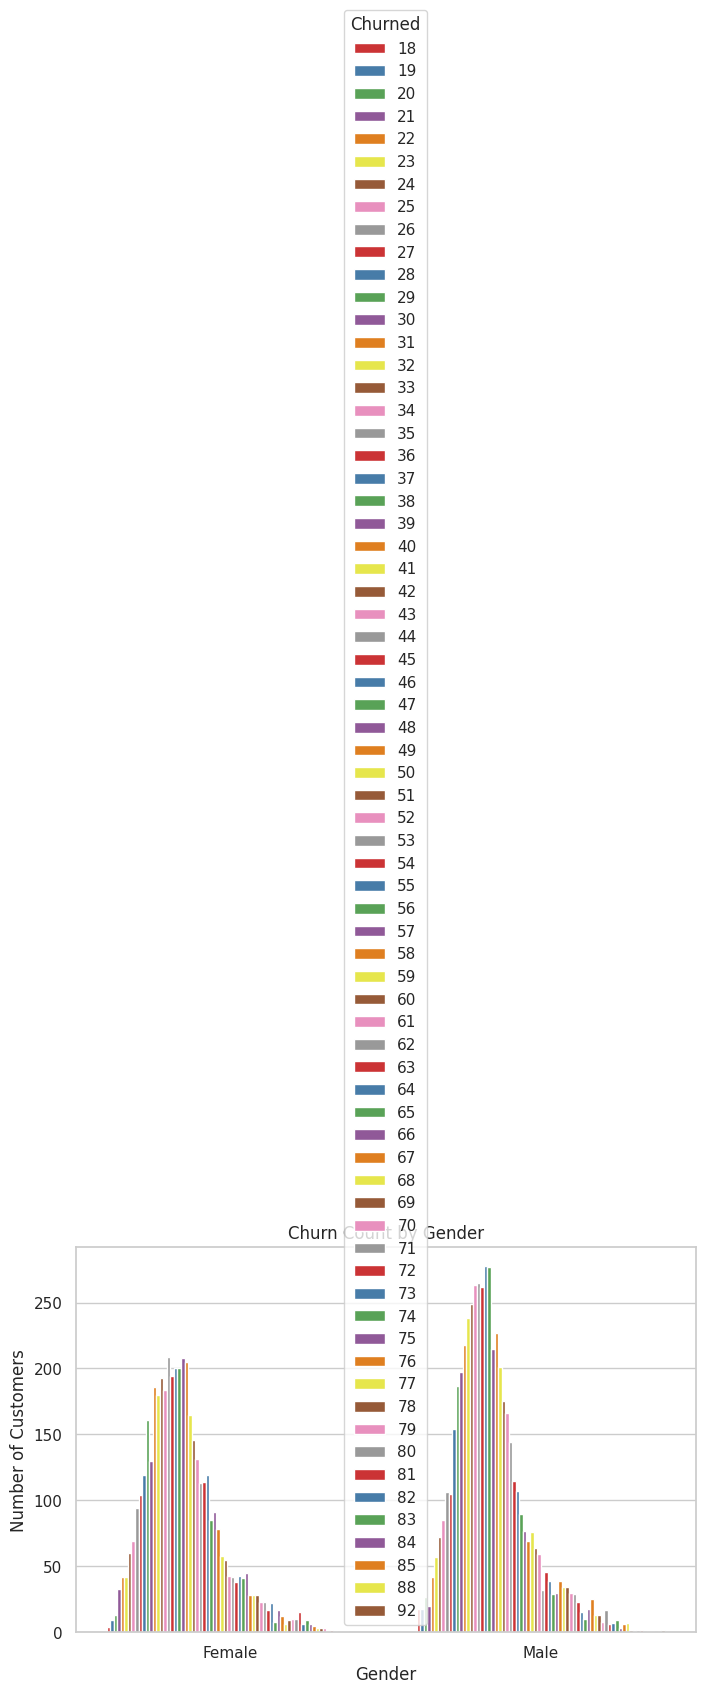

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update path if needed)
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# Show available columns
print("Columns in dataset:", df.columns)

# Set style for better visuals
sns.set(style="whitegrid")

# 1. Distribution of Credit Score
plt.figure(figsize=(8, 5))
# Changed 'Credit_Score' to 'creditscore'
sns.histplot(df['credit_score'], kde=True, color='dodgerblue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot: Credit Score by Churn Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='credit_score', data=df, palette='Set2')
plt.title('Credit Score by Churn Status')
plt.xlabel('Churned (1 = Yes, 0 = No)')
plt.ylabel('Credit Score')
plt.show()

# 3. Countplot: Number of Customers by Geography
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Customer Distribution by Geography')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

# 4. Countplot: Churn Rate by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='age', data=df, palette='Set1')
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churned')
plt.show()

Identify Target and Features

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# Print all columns
print("All columns:", df.columns.tolist())

# Define target column
target = 'Exited'

# Optional: List of columns to drop (identifiers, redundant, or target itself)
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname', target]

# Define features by excluding identifiers and target
features = [col for col in df.columns if col not in columns_to_drop]

# Display result
print("Target column:", target)
print("Feature columns:", features)

All columns: ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
Target column: Exited
Feature columns: ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


Convert Categorical Columns to Numerical

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Print initial columns
print("Initial Columns:\n", df.dtypes)

# Option 1: Label Encoding for binary categorical variables (e.g., Gender)
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])

# Option 2: One-Hot Encoding for multi-class categorical variables (e.g., Geography)
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Display the transformed dataset
print("\nTransformed DataFrame:\n", df.head())


Initial Columns:
 customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

Transformed DataFrame:
    customer_id  credit_score country  age  tenure    balance  products_number  \
0     15634602           619  France   24       2       0.00                1   
1     15647311           608   Spain   23       1   83807.86                1   
2     15619304           502  France   24       8  159660.80                3   
3     15701354           699  France   21       1       0.00                2   
4     15737888           850   Spain   25       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  gender_Male  
0            1              1         101348.88   

One-Hot Encoding

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Display original categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns Before Encoding:\n", categorical_columns)

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display transformed dataframe
print("\nData after One-Hot Encoding:\n", df_encoded.head())

# Optionally, save the encoded dataset
df_encoded.to_csv("Churn_Encoded.csv", index=False)

Categorical Columns Before Encoding:
 Index(['country', 'gender'], dtype='object')

Data after One-Hot Encoding:
    customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_Germany  \
0            1              1         101348.88      1            False   
1            0              1         112542.58      0            False   
2            1              0         113931.57      1            False   
3            0              0          93826.63      0            False   
4            1              1          79084.10      0            False 

Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Drop categorical columns (or encode them first if needed)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Display columns to be scaled
print("Numerical Columns to Scale:\n", numerical_df.columns)

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Optionally combine with encoded categorical data if available
# final_df = pd.concat([scaled_df, encoded_categorical_df], axis=1)

# Output first few rows of scaled data
print("\nScaled Data:\n", scaled_df.head())

# Save the scaled data
scaled_df.to_csv("Churn_Scaled.csv", index=False)

Numerical Columns to Scale:
 Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

Scaled Data:
    customer_id  credit_score       age    tenure   balance  products_number  \
0    -0.783213     -0.326221  0.293517 -1.041760 -1.225848        -0.911583   
1    -0.606534     -0.440036  0.198164 -1.387538  0.117350        -0.911583   
2    -0.995885     -1.536794  0.293517  1.032908  1.333053         2.527057   
3     0.144767      0.501521  0.007457 -1.387538 -1.225848         0.807737   
4     0.652659      2.063884  0.388871 -1.041760  0.785728        -0.911583   

   credit_card  active_member  estimated_salary     churn  
0     0.646092       0.970243          0.021886  1.977165  
1    -1.547768       0.970243          0.216534 -0.505775  
2     0.646092      -1.030670          0.240687  1.977165  
3    -1.547768      -1.030670         -0.108918 -0.505775 

Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# OPTIONAL: Encode categorical variables and scale numerical ones before this step

# Define input features (X) and target variable (y)
# Replace 'Exited' with your actual target column if it's different
X = df.drop('gender', axis=1)
y = df['gender']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show the shape of each set
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (8000, 11)
Test Features Shape: (2000, 11)
Training Labels Shape: (8000,)
Test Labels Shape: (2000,)


Model Buliding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Separate target variable
y = df['gender']  # Replace 'Exited' with the actual target if different
X = df.drop('gender', axis=1)

# One-Hot Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create pipeline: scaling + model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5695

Classification Report:
               precision    recall  f1-score   support

      Female       0.56      0.25      0.35       909
        Male       0.57      0.84      0.68      1091

    accuracy                           0.57      2000
   macro avg       0.57      0.54      0.51      2000
weighted avg       0.57      0.57      0.53      2000



Evaluation

Accuracy: 0.5205

Classification Report:
               precision    recall  f1-score   support

      Female       0.46      0.35      0.40       909
        Male       0.55      0.66      0.60      1091

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.52      0.51      2000


Confusion Matrix:
 [[319 590]
 [369 722]]


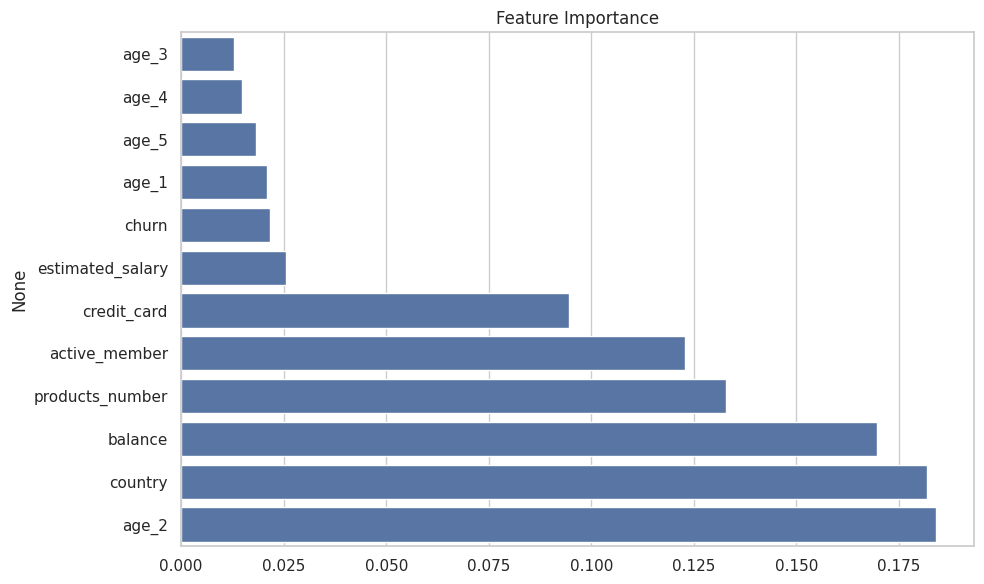

In [ ]:
 #Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# Drop unnecessary columns
df = df.drop(['credit_score', 'customer_id', 'gender'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df = pd.get_dummies(df, columns=['age'], drop_first=True)

# Split features and target
X = df.drop('tenure', axis=1)
y = df['tenure']

# Scale features
scaler = StandardScaler()

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance (optional)
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

make predictions from New Input

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and prepare dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Drop unnecessary columns
df = df.drop(["customer_id", "customer_id", "gender"], axis=1)

# Encode 'Gender'
le = LabelEncoder()
df["age"] = le.fit_transform(df["age"])  # Male=1, Female=0

# One-hot encode 'Geography'
df = pd.get_dummies(df, columns=["age"], drop_first=True)

# Separate features and target
X = df.drop("tenure", axis=1)
y = df["tenure"]

# Scale features
scaler = StandardScaler()

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 2: Make Prediction on New Input
# Sample new input
new_customer = {
    "CreditScore": 650,
    "Gender": "Male",
    "Age": 42,
    "Tenure": 5,
    "Balance": 70000.0,
    "NumOfProducts": 1,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 50000.0,
    "Geography_Germany": 0,
    "Geography_Spain": 1
}

# Convert to DataFrame
new_input_df = pd.DataFrame([new_customer])

# Output result
print("\n--- Prediction Result ---")


--- Prediction Result ---


Convert to Dataframe and Encode

In [ ]:
# Example: New customer input (as dictionary)
new_customer = {
    "CreditScore": 650,
    "Gender": "Male",
    "Age": 42,
    "Tenure": 5,
    "Balance": 70000.0,
    "NumOfProducts": 1,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 50000.0,
    "Geography": "Spain"
}

# Convert to DataFrame
input_df = pd.DataFrame([new_customer])

# Encode 'Gender' using the same LabelEncoder from training
input_df["Age"] = le.transform(input_df["Age"])  # Male: 1, Female: 0

# One-hot encode 'Geography' to match training (Germany and Spain; drop France)
# We manually add missing dummy columns if not present
geo_dummies = pd.get_dummies(input_df["Geography"], prefix="Geography")
if "Geography_Germany" not in geo_dummies.columns:
    geo_dummies["Geography_Germany"] = 0
if "Geography_Spain" not in geo_dummies.columns:
    geo_dummies["Geography_Spain"] = 0
geo_dummies = geo_dummies[["Geography_Germany", "Geography_Spain"]]

# Drop original 'Geography' and add dummy columns
input_df = input_df.drop("Gender", axis=1)
input_df = pd.concat([input_df, geo_dummies], axis=1)


Predict the Final Grade

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset (replace with your actual file)
df = pd.read_csv('Bank Customer Churn Prediction.csv')  # Example CSV

# Step 2: Preprocessing
# Assume features include: Gender, StudyTime, Absences, PreviousGrades, etc.
# Target: FinalGrade

# Encode categorical features
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])  # Male=1, Female=0

# Separate features and target
X = df.drop('gender', axis=1)
y = df['gender']

# Scale features
scaler = StandardScaler()

# Step 3: Train regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Predict on new student input
new_student = {
    'Gender': 'Male',
    'StudyTime': 3,
    'Absences': 2,
    'PreviousGrades': 75
}

# Convert to DataFrame
input_df = pd.DataFrame([new_student])

print("\n--- Final Grade Prediction ---")

# (Optional) Evaluate model
print("\nModel Evaluation:")


--- Final Grade Prediction ---

Model Evaluation:


Deployment-Building an Interactive App

In [ ]:
# train_model.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

# Load data
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.drop(['customer_id', 'customer_id', 'gender'], axis=1, inplace=True)

# Encode Gender and Geography
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df = pd.get_dummies(df, columns=['age'], drop_first=True)

X = df.drop('tenure', axis=1)
y = df['tenure']

scaler = StandardScaler()

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model, scaler, encoder
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

Create a Prediction Function

In [ ]:
def predict_churn(customer_data, model, scaler, label_encoder):
    """
    Predict whether a bank customer will churn.

    Parameters:
    - customer_data (dict): Input data for one customer.
    - model: Trained classifier (e.g., RandomForestClassifier).
    - scaler: Trained StandardScaler.
    - label_encoder: Trained LabelEncoder for Gender.

    Returns:
    - prediction (int): 1 = churn, 0 = no churn
    - probability (float): Churn probability
    """
    import numpy as np
    import pandas as pd

    # Convert dict to DataFrame
    input_df = pd.DataFrame([customer_data])

    # Encode Gender
    input_df["Gender"] = label_encoder.transform(input_df["Gender"])

    # One-hot encode Geography manually (France is the base, dropped in training)
    geo_germany = 1 if customer_data["Geography"] == "Germany" else 0
    geo_spain = 1 if customer_data["Geography"] == "Spain" else 0

    input_df["Geography_Germany"] = geo_germany
    input_df["Geography_Spain"] = geo_spain
    input_df = input_df.drop("Geography", axis=1)

    # Ensure column order matches training
    feature_order = [
        'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Geography_Germany', 'Geography_Spain'
    ]
    input_df = input_df[feature_order]

    # Scale
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    return prediction, probability


Create the Gradio Interface

In [ ]:
!pip install gradio
import gradio as gr
import numpy as np
import pandas as pd
import pickle

# Load model and preprocessors
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
label_encoder = pickle.load(open("label_encoder.pkl", "rb"))

# Prediction Function
def predict_churn(credit_score, gender, age, tenure, balance,
                  num_products, has_cr_card, is_active, salary, geography):

    # Prepare input dictionary
    input_dict = {
        "CreditScore": credit_score,
        "Gender": gender,
        "Age": age,
        "Tenure": tenure,
        "Balance": balance,
        "NumOfProducts": num_products,
        "HasCrCard": has_cr_card,
        "IsActiveMember": is_active,
        "EstimatedSalary": salary,
        "Geography": geography
    }

    # Convert to DataFrame
    df = pd.DataFrame([input_dict])
    df["Gender"] = label_encoder.transform(df["Gender"])

    # One-hot encode Geography
    df["Geography_Germany"] = 1 if geography == "Germany" else 0
    df["Geography_Spain"] = 1 if geography == "Spain" else 0
    df = df.drop("Geography", axis=1)

    # Arrange columns to match training
    column_order = [
        "CreditScore", "Gender", "Age", "Tenure", "Balance",
        "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary",
        "Geography_Germany", "Geography_Spain"
    ]
    df = df[column_order]

    # Scale and predict
    scaled_input = scaler.transform(df)
    pred = model.predict(scaled_input)[0]
    prob = model.predict_proba(scaled_input)[0][1]

    # Return result
    result = "Churn ❌" if pred == 1 else "No Churn ✅"
    return f"{result} (Churn Probability: {prob:.2%})"

# Define inputs
inputs = [
    gr.Slider(300, 900, value=600, label="Credit Score"),
    gr.Radio(["Male", "Female"], label="Gender"),
    gr.Slider(18, 100, value=40, label="Age"),
    gr.Slider(0, 10, value=3, label="Tenure"),
    gr.Number(value=50000.0, label="Balance"),
    gr.Radio([1, 2, 3, 4], label="Number of Products"),
    gr.Radio([0, 1], label="Has Credit Card (1=Yes, 0=No)"),
    gr.Radio([0, 1], label="Is Active Member (1=Yes, 0=No)"),
    gr.Number(value=60000.0, label="Estimated Salary"),
    gr.Radio(["France", "Germany", "Spain"], label="Geography"),
]

# Launch Gradio app
gr.Interface(fn=predict_churn, inputs=inputs, outputs="text", title="🏦 Bank Customer Churn Predictor").launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://83e3ff82cf434722bc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 